# **Profile** <br>
*Nama: Nur Muhammad Himawan* <br>
*Path: Machine Learning & Front End Development* <br>
*Progam: Studi Independen Batch 3 - Kampus Merdeka*

# **Proyek Akhir : Membuat Model Sistem Rekomendasi**

Selamat! Akhirnya Anda telah sampai di penghujung pembelajaran.

Untuk lulus dari kelas ini, Anda harus mengirimkan submission Proyek Akhir: Membuat Model Sistem Rekomendasi. Dalam proyek akhir ini, Anda akan mengimplementasikan apa yang telah Anda pelajari di seluruh modul untuk membuat sistem rekomendasi dan menulis laporan proyek. 

Pilihlah topik permasalahan yang ingin Anda selesaikan dengan menerapkan teknik dan algoritma pada modul Sistem Rekomendasi. Kemudian, buatlah draf laporan proyek Anda sesuai dengan kriteria dan ketentuan pada sub modul selanjutnya.

## **A. Business Understanding**

Building machine learning models for movie recommendations

## **B. Data Understanding**

### **Preparing Dataset**

menggunakan perintah wget di Colaboratory untuk mengambil dataset dari sumber eksternal.
Dataset merupakan data sekunder yang diperoleh melalui website GroupLens dengan judul [MovieLens 25M Dataset](https://grouplens.org/datasets/movielens/#:~:text=MovieLens%2025M%20Dataset).

GroupLens Research telah mengumpulkan dan menyediakan dataset film dari situs web [MovieLens](https://movielens.org).

In [1]:
# datasets
! wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2022-09-23 23:12:03--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  13.6MB/s    in 20s     

2022-09-23 23:12:24 (12.4 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [2]:
# unzip
! unzip ml-25m.zip -d /content/data/

Archive:  ml-25m.zip
   creating: /content/data/ml-25m/
  inflating: /content/data/ml-25m/tags.csv  
  inflating: /content/data/ml-25m/links.csv  
  inflating: /content/data/ml-25m/README.txt  
  inflating: /content/data/ml-25m/ratings.csv  
  inflating: /content/data/ml-25m/genome-tags.csv  
  inflating: /content/data/ml-25m/genome-scores.csv  
  inflating: /content/data/ml-25m/movies.csv  


Dataset sudah ter-extract dan berada pada folder terpisah di path '/content/data/ml-25m/'

### **Data Loading**

Saya ingin melihat ada file apa saja yang terdapat pada file zip. pertama, saya akan mencari directory path dari datasetnya. kemudian menggunakan basic command 'ls' untuk menampilkan list files-nya.

In [3]:
# current directory
! pwd

/content


In [4]:
# change directory
%cd data/ml-25m/

/content/data/ml-25m


In [5]:
# list directory contents
! ls

genome-scores.csv  links.csv   ratings.csv  tags.csv
genome-tags.csv    movies.csv  README.txt


Disini saya mendapatkan 7 files (6 files berformat csv dan README). Saya tidak tahu isi dari 6 files dataset tersebut, namun terdapat README files yang biasanya akan mendeskripsikan secara singkat isi dari dataset didalamnya. Oleh karena itu, saya akan melihat isi dari file README terlebih dahulu.

In [6]:
# readme file
txt_files = '/content/data/ml-25m/README.txt'
txt_content = open(txt_files, 'r').read()
print(txt_content)

Summary

This dataset (ml-25m) describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 25000095 ratings and 1093360 tag applications across 62423 movies. These data were created by 162541 users between January 09, 1995 and November 21, 2019. This dataset was generated on November 21, 2019.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` and `tags.csv`. More details about the contents and use of all these files follows.

This and other GroupLens data sets are publicly available for download at <http://grouplens.org/datasets/>.


Usage License

Neither the University of Minnesota nor any of the researchers involved can guarantee the 

movies.csv merupakan dataset utama yang terdapat kumpulan data film yang akan digunakan dalam sistem rekomendasi nantinya

In [7]:
# loads library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ignore all future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

mengecek jumlah data pada masing-masing dataset

In [8]:
# define dataset variable
movies = pd.read_csv('/content/data/ml-25m/movies.csv') #data film
ratings = pd.read_csv('/content/data/ml-25m/ratings.csv') #data ratings film
tags = pd.read_csv('/content/data/ml-25m/tags.csv') # data tag film
links = pd.read_csv('/content/data/ml-25m/links.csv') #data links setiap film
genome_tags = pd.read_csv('/content/data/ml-25m/genome-tags.csv') #data relevansi tag film
genome_scores = pd.read_csv('/content/data/ml-25m/genome-scores.csv') #data skor relevansi tag film

# check and count unique values in each dataframes
print('Jumlah data film: ', len(movies.movieId.unique()))
print('Jumlah data ratings atau penilaian: ', len(ratings.userId.unique()))
print('Jumlah data tags film: ', len(tags.userId.unique()))
print('Jumlah data links film: ', len(links.movieId.unique()))
print('Jumlah data genome tags: ', len(genome_tags.tagId.unique()))
print('Jumlah data genome scores: ', len(genome_scores.movieId.unique()))

Jumlah data film:  62423
Jumlah data ratings atau penilaian:  162541
Jumlah data tags film:  14592
Jumlah data links film:  62423
Jumlah data genome tags:  1128
Jumlah data genome scores:  13816


jumlah data pada dataset film lumayan banyak sekitar 62 ribu dan ini sangat bagus untuk mengembangkan model rekomendasi. menggunakan function .info() dapat melihat information dari dataset.

In [9]:
# movies information
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [10]:
# ratings information
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [11]:
# tags information
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [12]:
# links information
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [13]:
# genome_tags information
genome_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [14]:
# genome_scores information
genome_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


Berdasarkan informasi diatas, saya ingin membagi 6 files tersebut menjadi 3 data secara umum yaitu films, users, dan skor relevansi films. kemudian, saya akan mencoba melihat jumlah datanya.

In [15]:
# skor relevansi tag
# dataframe by tagId

# Menggabungkan seluruh tagId pada kategori genome
genome_tags_all = np.concatenate((
    genome_tags.tagId.unique(),
    genome_scores.tagId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
genome_tags_all = np.sort(np.unique(genome_tags_all))
 
print('Jumlah seluruh data genome_tags: ', len(genome_tags_all))

Jumlah seluruh data genome_tags:  1128


In [16]:
# ID film konsisten antara ratings.csv, tags.csv, movies.csv, dan links.csv
# (yaitu, id yang sama merujuk ke film yang sama di keempat file data ini)
# dataframe by moviesId
import numpy as np
 
# Menggabungkan seluruh movieId pada kategori movies
movies_all = np.concatenate((
    movies.movieId.unique(),
    tags.movieId.unique(),
    ratings.movieId.unique(),
    links.movieId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
movies_all = np.sort(np.unique(movies_all))
 
print('Jumlah seluruh data movies berdasarkan movieId: ', len(movies_all))

Jumlah seluruh data movies berdasarkan movieId:  62423


In [17]:
# ID pengguna konsisten antara ratings.csvdan tags.csv
# (yaitu, id yang sama merujuk ke pengguna yang sama di dua file)
# dataframe by userId
import numpy as np
 
# Menggabungkan seluruh userId pada kategori user
user_all = np.concatenate((
    ratings.userId.unique(),
    tags.userId.unique()
))
 
# Mengurutkan data dan menghapus data yang sama
user_all = np.sort(np.unique(user_all))
 
print('Jumlah seluruh data user berdasarkan userId: ', len(user_all))

Jumlah seluruh data user berdasarkan userId:  162541


Dari informasi diatas, jumlah data pada relevancy score sangat sedikit yaitu 1K. berbanding terbalik dengan jumlah data user dan films yang masing-masing berjumlah sekitar 62K dan 162K. maka, saya akan melanjutkan dengan menggunakan data film dan users saja.

## **C. Data Preparation**

### **Data Cleaning I**

**Films**

In [18]:
# dataset films
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


memisahkan judul films dengan tahun rilis untuk menghindari terjadinya redundansi data

In [19]:
#separate tittles by year of release
movies['year_of_release'] = movies.title.str.extract('([0-9]{4})')
movies.head()

,movieId,title,genres,year_of_release
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


menghilangkan tahun rilis pada kolom judul films

In [20]:
#convert column to string
movies['title'] = movies['title'].astype(str)

#remove year
movies['title'] = movies['title'].str.split('(', 1).str[0].str.strip()
movies.head()

,movieId,title,genres,year_of_release
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


Untuk sementara, dataframe films sudah terlihat cukup baik.

**Users ratings**

In [21]:
# dataset user ratings
ratings

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


mengecek isi data pada kolom ratings

In [22]:
# check values in rating columns
ratings.rating.unique()

array([5. , 3.5, 4. , 2.5, 4.5, 3. , 0.5, 2. , 1. , 1.5])

ternyata kolom ratings memiliki sebaran data yang tidak normal, dimana data rating memiliki skala 0.5 sampai 5 dengan perbedaan 0.5 setiap skalanya. saya akan membulatkannya agar memiliki 5 nilai skala yaitu 1 - 5.

In [23]:
# round values
ratings['rating'] = ratings['rating'].apply(np.ceil)

In [24]:
# recheck values in rating columns
ratings.rating.unique()

array([5., 4., 3., 1., 2.])

mengonversi timestamp menjadi datetime. timestamp merupakan informasi waktu yang disandikan dengan serangkaian karakter yang mengidentifikasi kapan peristiwa terjadi dengan memberikan tanggal dan waktu, yang dapat akurat hingga sepersekian detik. 

In [25]:
# unit='s' to convert it into epoch time
import datetime

ratings.timestamp = pd.to_datetime(ratings['timestamp'], unit='s')
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,2006-05-17 15:34:04
1,1,306,4.0,2006-05-17 12:26:57
2,1,307,5.0,2006-05-17 12:27:08
3,1,665,5.0,2006-05-17 15:13:40
4,1,899,4.0,2006-05-17 12:21:50


Untuk sementara, dataframe user ratings sudah terlihat cukup baik.

### **Data Merging & Cleaning II**

**Films and User ratings**

Selanjutnya adalah menggabungkan kedua dataframe sebelumnya (films and user ratings) menjadi satu dataframe yang utuh.

In [26]:
# merge dataframe
films = pd.merge(movies, ratings, on='movieId', how='left')
films

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,2015-08-13 13:23:35
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,2019-11-16 22:44:12
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,1997-03-17 19:12:29
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,1998-03-21 15:01:57
...,...,...,...,...,...,...,...
25003466,209157,We,Drama,2018,119571.0,2.0,2019-11-20 20:12:28
25003467,209159,Window of the Soul,Documentary,2001,115835.0,3.0,2019-11-20 20:16:25
25003468,209163,Bad Poems,Comedy|Drama,2018,6964.0,5.0,2019-11-20 21:21:53
25003469,209169,A Girl Thing,(no genres listed),2001,119571.0,3.0,2019-11-20 23:17:06


memeriksa data yang hilang, null atau kosong dan membersihkannya.

In [27]:
# check missing values
(films.isnull() | films.empty | films.isna()).sum()

movieId                0
title                  0
genres                 0
year_of_release    11581
userId              3376
rating              3376
timestamp           3376
dtype: int64

In [28]:
# handling missing values
films = films.dropna()
films

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,2015-08-13 13:23:35
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,2019-11-16 22:44:12
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,1997-03-17 19:12:29
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,1998-03-21 15:01:57
...,...,...,...,...,...,...,...
25003466,209157,We,Drama,2018,119571.0,2.0,2019-11-20 20:12:28
25003467,209159,Window of the Soul,Documentary,2001,115835.0,3.0,2019-11-20 20:16:25
25003468,209163,Bad Poems,Comedy|Drama,2018,6964.0,5.0,2019-11-20 21:21:53
25003469,209169,A Girl Thing,(no genres listed),2001,119571.0,3.0,2019-11-20 23:17:06


In [29]:
# recheck missing values
(films.isnull() | films.empty | films.isna()).sum()

movieId            0
title              0
genres             0
year_of_release    0
userId             0
rating             0
timestamp          0
dtype: int64

Sekilas, saat handling missing values pada proses sebelumnya, terdapat data '(no genres listed)' pada kolom genre films. 

In [70]:
# show genre films
import sys

np.set_printoptions(threshold=sys.maxsize)
print('Banyak genre films: ', len(films['genres'].unique()))
print('Genre films: ', films['genres'].unique())
np.set_printoptions(threshold=None)

Banyak genre films:  1017
Genre films:  ['Adventure|Animation|Children|Comedy|Fantasy'
 'Adventure|Children|Fantasy' 'Comedy|Romance' 'Comedy|Drama|Romance'
 'Comedy' 'Action|Crime|Thriller' 'Adventure|Children' 'Action'
 'Action|Adventure|Thriller' 'Comedy|Horror'
 'Adventure|Animation|Children' 'Drama' 'Action|Adventure|Romance'
 'Crime|Drama' 'Drama|Romance' 'Action|Comedy|Crime|Drama|Thriller'
 'Comedy|Crime|Thriller' 'Crime|Drama|Horror|Mystery|Thriller'
 'Drama|Scifi' 'Children|Drama' 'Adventure|Drama|Fantasy|Mystery|Scifi'
 'Mystery|Scifi|Thriller' 'Adventure|Romance|IMAX' 'Documentary|IMAX'
 'Children|Comedy' 'Drama|War' 'Action|Crime|Drama'
 'Action|Adventure|Fantasy' 'Comedy|Drama|Thriller' 'Mystery|Thriller'
 'Animation|Children|Drama|Musical|Romance' 'Crime|Mystery|Thriller'
 'Adventure|Drama' 'Adventure|Children|Comedy|Fantasy' 'Drama|Mystery'
 'Drama|Thriller' 'Comedy|Crime' 'Action|Scifi|Thriller'
 'Action|Comedy|Horror|Thriller' 'Comedy|Drama' 'Documentary'
 'Action|Cri

ternyata memang benar terdapat **'(no genres listed)'** yang mengindikasikan ada beberapa films yang tidak memiliki genre. pendekatan **content-based filterring** akan diterapkan dalam proyek ini. maka, genre film akan menjadi fitur yang sangat penting. sebelumnya, saya akan mengecek terlebih dahulu seberapa banyak film yang tidak memiliki genre.

In [31]:
# show non-genre
films[films['genres']=='(no genres listed)']

,movieId,title,genres,year_of_release,userId,rating,timestamp
22550152,83773,Away with Words,(no genres listed),1999,26031.0,3.0,2011-03-02 20:56:26
22550153,83773,Away with Words,(no genres listed),1999,72315.0,1.0,2016-04-26 19:13:25
22575388,84768,Glitterbug,(no genres listed),1994,72315.0,3.0,2015-12-15 08:07:44
22575389,84768,Glitterbug,(no genres listed),1994,119765.0,3.0,2011-02-28 06:24:03
22575390,84768,Glitterbug,(no genres listed),1994,137293.0,3.0,2011-02-28 13:20:48
...,...,...,...,...,...,...,...
25003446,209103,Tsar Ivan the Terrible,(no genres listed),1991,13737.0,4.0,2019-11-18 21:23:59
25003452,209133,The Riot and the Dance,(no genres listed),2018,127710.0,5.0,2019-11-19 17:57:15
25003453,209133,The Riot and the Dance,(no genres listed),2018,145795.0,1.0,2019-11-20 04:49:32
25003463,209151,Mao Zedong 1949,(no genres listed),1949,125475.0,4.0,2019-11-20 06:44:08


terdapat 23K yang jumlah data films yang tidak memiliki genre, saya akan menghapusnya karna cukup sedikit mengingat data yang dimiliki berjumlah sekitar 25 juta.

In [32]:
# clean non-genre
films = films[(films.genres != '(no genres listed)')]
films.head()

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,2015-08-13 13:23:35
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,2019-11-16 22:44:12
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,1997-03-17 19:12:29
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,1998-03-21 15:01:57


dari 25 juta data sebelumnya, saya memiliki asumsi ada beberapa films yang mendapatkan sedikit review dari users, dengan asumsi rating terendah adalah 1 dan rating tertinggi adalah 5. maka, saya akan membuang film yang mendapatkan penilaian kurang dari 100 pereview (jumlah rating 50-250) yaitu yang setidaknya memiliki rating kurang dari 50.

In [33]:
films.groupby('movieId').sum()

,userId,rating
movieId,,
1,4.658910e+09,229678.0
2,1.971155e+09,81831.0
3,9.601810e+08,37885.0
4,2.050346e+08,7302.0
5,9.488676e+08,36682.0
...,...,...
209155,1.349160e+05,5.0
209157,1.195710e+05,2.0
209159,1.158350e+05,3.0


In [34]:
# remove the low rating
get_values=films['movieId'].value_counts()
temp = films.movieId.value_counts()[get_values>=50].index
films = films[films['movieId'].isin(temp)]
films

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.0,4.0,2015-08-13 13:23:35
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,4.0,3.0,2019-11-16 22:44:12
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,5.0,4.0,1997-03-17 19:12:29
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,8.0,4.0,1998-03-21 15:01:57
...,...,...,...,...,...,...,...
25002983,207830,Terminator: Dark Fate,Action|Sci-Fi,2019,144301.0,4.0,2019-11-05 20:10:55
25002984,207830,Terminator: Dark Fate,Action|Sci-Fi,2019,148647.0,3.0,2019-11-05 03:28:35
25002985,207830,Terminator: Dark Fate,Action|Sci-Fi,2019,154088.0,4.0,2019-11-06 06:18:53
25002986,207830,Terminator: Dark Fate,Action|Sci-Fi,2019,154546.0,4.0,2019-11-02 14:07:44


Data yang ada berjumlah sekitar 24.6 juta, saya memiliki asumsi terdapat data yang duplikat didalamnya.

In [35]:
# duplicated by movieId
films.duplicated('movieId').sum()

24612098

In [36]:
# duplicated by title
films.duplicated('title').sum()

24612618

terdapat banyak duplikasi data didalamnya, selanjutnya saya akan menghapusnya.

In [37]:
# drop duplicated data by movieId & title
films = films.drop_duplicates('movieId')
films = films.drop_duplicates('title')

Sekilas ketika menampilkan genre films sebelumnya, saya mendapati genre **'Sci-Fi'**. setelah saya pahami, ternyata **'Sci-Fi'** merupakan akronim dari kata **'Science Fiction'** yang menggambarkan film fiksi ilmiah. kata **'Sci-Fi'** memiliki separator dash atau tanda pisah. Hal ini, perlu dihilangkan. apabila tidak dihilangkan maka pada tahap vektorisasi TF-IDF nantinya kata **'Sci-Fi'** akan diperlakukan sebagai 2 kata yang berbeda **'Sci'** dan **'Fi'**.

In [38]:
# replace the matching strings for 'sci-fi' using regex
films = films.replace(to_replace ='[nS]ci-Fi', value = 'Scifi', regex = True)
films.head()

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
57309,2,Jumanji,Adventure|Children|Fantasy,1995,9.0,5.0,1997-03-26 13:32:22
81537,3,Grumpier Old Men,Comedy|Romance,1995,8.0,4.0,1998-03-21 15:08:26
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995,141.0,3.0,1996-07-30 07:29:46
95864,5,Father of the Bride Part II,Comedy,1995,18.0,4.0,2005-02-13 05:52:25


membuat variabel 'preparation' untuk menampung data yang sudah bersih.

In [39]:
# create preparation variable
preparation = films
preparation.sort_values('movieId').head()

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
57309,2,Jumanji,Adventure|Children|Fantasy,1995,9.0,5.0,1997-03-26 13:32:22
81537,3,Grumpier Old Men,Comedy|Romance,1995,8.0,4.0,1998-03-21 15:08:26
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995,141.0,3.0,1996-07-30 07:29:46
95864,5,Father of the Bride Part II,Comedy,1995,18.0,4.0,2005-02-13 05:52:25


mengonversi data series menjadi bentuk list

In [40]:
# Convert data series ‘movieId’ to list form
film_id = preparation['movieId'].tolist()

# Convert data series ‘title’ to list form
film_name = preparation['title'].tolist()

# Convert data series ‘genres’ to list form
film_genre = preparation['genres'].tolist()

print(len(film_id))
print(len(film_name))
print(len(film_genre))

12608
12608
12608


In [41]:
# Create dataframe using dict form of ‘film_id’, ‘film_name’, and ‘film_genre’
df_film = pd.DataFrame({
    'film_id': film_id,
    'film_name': film_name,
    'genre': film_genre
})

df_film

,film_id,film_name,genre
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy
...,...,...,...
12603,205076,Downton Abbey,Drama
12604,205383,El Camino: A Breaking Bad Movie,Crime|Drama|Thriller
12605,205425,Dave Chappelle: Sticks & Stones,Comedy
12606,206499,Between Two Ferns: The Movie,Comedy


Yeay, Data akhir yang berjumlah sekitar 12K telah siap untuk digunakan ke dalam proses modelling.

## **D. Model Development**

### **Content Based Filtering**

**Assign dataframe to new variable**

meng-assign dataframe ke variabel data

In [42]:
# data sample
data = df_film
data.sample(5)

,film_id,film_name,genre
12315,183421,Red Sparrow,Thriller
951,1069,"Murder, My Sweet",Crime|Film-Noir|Thriller
8635,57532,Meet the Spartans,Comedy
11193,122916,Thor: Ragnarok,Action|Adventure|Scifi
8113,48043,"Fountain, The",Drama|Fantasy|Romance


**TF-IDF Vectorizer**

proses term frequency-inverse document frequency (TF-IDF) untuk mencari kata yang penting dalam kolom genre. setelah melakukan perhitungan idf akan didapatkan index. kemudian, saya akan mencoba melakukan mapping untuk menampilkan data genre-nya.


In [43]:
# library
from sklearn.feature_extraction.text import TfidfVectorizer
 
# create object TfidfVectorizer
tf = TfidfVectorizer()
 
# idf
tf.fit(data['genre']) 
 
# mapping array
tf.get_feature_names() 

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'film',
 'horror',
 'imax',
 'musical',
 'mystery',
 'noir',
 'romance',
 'scifi',
 'thriller',
 'war',
 'western']

In [44]:
# fit & transform to matrix
tfidf_matrix = tf.fit_transform(data['genre']) 
 
# show matrix dimension
tfidf_matrix.shape 

(12608, 20)

didapatkan ukuran matrix (12608, 20). dimana terdapat 12608 jumlah data dan 20 genre films. karena hasil 'tfidf' masih berbentuk vektor maka akan saya ubah ke dalam bentuk matrix.

In [45]:
# change tf-idf vector to matrix form
tfidf_matrix.todense()

matrix([[0.        , 0.42081801, 0.51597569, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.51699784, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.63558857, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

melihat hasil matriks tf-idf untuk beberapa sample film

In [46]:
# dataframe tf-idf matrix, row: film_name, columns: genre_films
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.film_name
).sample(20, axis=1).sample(10, axis=0)

,mystery,crime,documentary,romance,animation,children,drama,adventure,horror,western,musical,thriller,noir,scifi,imax,war,comedy,fantasy,film,action
film_name,,,,,,,,,,,,,,,,,,,,
I Am Not a Serial Killer,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
Magical Mystery Tour,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.905093,0.000000,0.0,0.00000,0.0,0.000000,0.425213,0.0,0.0,0.000000
Oscar,0.629565,0.518272,0.0,0.470865,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.336642,0.0,0.0,0.000000
"Misérables, Les",0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.384090,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.923296,0.000000,0.0,0.0,0.000000
Dear Diary,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.649767,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.760134,0.0,0.0,0.000000
Light of Day,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000
My Science Project,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.682109,0.0,0.0,0.000000,0.000000,0.0,0.73125,0.0,0.000000,0.000000,0.0,0.0,0.000000
Rurouni Kenshin: Kyoto Inferno,0.000000,0.000000,0.0,0.000000,0.648368,0.0,0.286677,0.528794,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.466704
Hellraiser: Hellseeker,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000


Yeay, dari sini sudah didapatkan representasi fitur penting dari setiap genre films.

**Cosine Similarity**

Tahap selanjutnya adalah menghitung similarity antar film yang satu dengan film lainnya berdasarkan genre


In [48]:
# calculate cosine similarity on matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.81396474, 0.1552213 , ..., 0.2668904 , 0.2668904 ,
        0.        ],
       [0.81396474, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1552213 , 0.        , 1.        , ..., 0.58159191, 0.58159191,
        0.        ],
       ...,
       [0.2668904 , 0.        , 0.58159191, ..., 1.        , 1.        ,
        0.        ],
       [0.2668904 , 0.        , 0.58159191, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

menampilkan similarity matrix setiap film dengan menampilkan nama film dalam baris dan kolom.

In [49]:
# create dataframe from the results of cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['film_name'], columns=data['film_name'])
print('Shape:', cosine_sim_df.shape)
 
# show similarity matrix
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (12608, 12608)


film_name,Gator,Schindler's List,Entrapment,Maze,Gates of Heaven
film_name,,,,,
Slam,0.523401,0.384090,0.000000,0.000000,0.0
Jesus of Montreal,0.523401,0.384090,0.000000,0.000000,0.0
A.I. Artificial Intelligence,0.181536,0.133218,0.000000,0.000000,0.0
Cocoon: The Return,0.000000,0.000000,0.000000,0.000000,0.0
Reconstruction,0.272936,0.200290,0.000000,0.853272,0.0
Mirrors,0.000000,0.000000,0.302763,0.000000,0.0
"Incredibly True Adventure of Two Girls in Love, The",0.000000,0.000000,0.000000,0.813481,0.0
Hands Off the Loot,0.204183,0.149837,0.920769,0.000000,0.0
Absolute Power,0.000000,0.000000,0.369681,0.000000,0.0


**Get Recommendations**

membuat function untuk merekomendasikan film dengan memberikan top 5 rekomendasi film.

In [50]:
# function recommendations
def film_recommendations(film_name, similarity_data=cosine_sim_df, items=data[['film_name', 'genre']], k=5): 
    # get data index
    index = similarity_data.loc[:,film_name].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # retrieve data from an existing index
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # drop film_name you want to search
    closest = closest.drop(film_name, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

melihat data sample

In [51]:
# sample data
data.sample(3)

,film_id,film_name,genre
9695,80858,You Again,Comedy
8934,62834,Babylon 5: The Legend of the Rangers: To Live ...,Scifi
285,301,Picture Bride,Drama|Romance


pada data sample terdapat film 'Harry Potter and the Prisoner of Azkaban'. saya akan mencari film rekomendasi yang tepat untuk itu.

In [52]:
# check data
data[data.film_name.eq('Harry Potter and the Prisoner of Azkaban')]

,film_id,film_name,genre
6496,8368,Harry Potter and the Prisoner of Azkaban,Adventure|Fantasy|IMAX


mencari film rekomendasi untuk 'Harry Potter and the Prisoner of Azkaban'

In [53]:
# get recommendations
film_recommendations('Harry Potter and the Prisoner of Azkaban')

,film_name,genre
0,Jack the Giant Slayer,Adventure|Fantasy|IMAX
1,"Hobbit: The Desolation of Smaug, The",Adventure|Fantasy|IMAX
2,"Hobbit: An Unexpected Journey, The",Adventure|Fantasy|IMAX
3,Harry Potter and the Order of the Phoenix,Adventure|Drama|Fantasy|IMAX
4,Harry Potter and the Goblet of Fire,Adventure|Fantasy|Thriller|IMAX


Yeay! Sistem rekomendasi berhasil memberikan 5 rekomendasi film.

### **Collaborative Filtering**

**Data Understanding**

menyiapkan beberapa library yang dibutuhkan

In [54]:
# loads libraries
from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

menyiapkan dataset 'preparation' sebelumnya dan meng-assignnya ke dalam variabel 'df'

In [55]:
# read dataset 
df = preparation
df

,movieId,title,genres,year_of_release,userId,rating,timestamp
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00
57309,2,Jumanji,Adventure|Children|Fantasy,1995,9.0,5.0,1997-03-26 13:32:22
81537,3,Grumpier Old Men,Comedy|Romance,1995,8.0,4.0,1998-03-21 15:08:26
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995,141.0,3.0,1996-07-30 07:29:46
95864,5,Father of the Bride Part II,Comedy,1995,18.0,4.0,2005-02-13 05:52:25
...,...,...,...,...,...,...,...
25000108,205076,Downton Abbey,Drama,2019,2111.0,5.0,2019-11-05 01:46:17
25000617,205383,El Camino: A Breaking Bad Movie,Crime|Drama|Thriller,2019,1099.0,5.0,2019-10-17 09:33:22
25000936,205425,Dave Chappelle: Sticks & Stones,Comedy,2019,2165.0,2.0,2019-09-08 01:32:54
25001872,206499,Between Two Ferns: The Movie,Comedy,2019,847.0,2.0,2019-09-29 05:01:05


**Data Preparation**

melakukan encoding pada fitur ‘userId’ dan ‘film_id’ ke dalam index

In [56]:
# change unique values of 'userId' to list
user_ids = df['userId'].unique().tolist()
print('list userID: ', user_ids)
 
# encode 'userId'
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# encoding index to 'userId'
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [2.0, 9.0, 8.0, 141.0, 18.0, 427.0, 41.0, 7.0, 198.0, 187.0, 23.0, 217.0, 5.0, 12.0, 80.0, 59.0, 34.0, 3.0, 47.0, 215.0, 592.0, 167.0, 166.0, 19.0, 36.0, 1956.0, 621.0, 407.0, 484.0, 1314.0, 13.0, 105.0, 130.0, 125.0, 230.0, 865.0, 526.0, 29.0, 73.0, 72.0, 2012.0, 201.0, 45.0, 1067.0, 414.0, 152.0, 803.0, 5975.0, 115.0, 417.0, 986.0, 892.0, 695.0, 124.0, 597.0, 2887.0, 1339.0, 106.0, 847.0, 626.0, 964.0, 79.0, 229.0, 112.0, 120.0, 25.0, 6.0, 39.0, 320.0, 4100.0, 179.0, 279.0, 264.0, 396.0, 371.0, 844.0, 61.0, 523.0, 1247.0, 10.0, 84.0, 235.0, 147.0, 322.0, 766.0, 100.0, 380.0, 135.0, 162.0, 226.0, 473.0, 748.0, 677.0, 199.0, 236.0, 85.0, 450.0, 1297.0, 133.0, 539.0, 864.0, 1498.0, 663.0, 752.0, 1.0, 925.0, 173.0, 2897.0, 1425.0, 447.0, 443.0, 262.0, 341.0, 22.0, 31.0, 294.0, 55.0, 40.0, 1089.0, 190.0, 240.0, 966.0, 7288.0, 123.0, 2965.0, 27.0, 738.0, 1646.0, 158.0, 77.0, 846.0, 103.0, 42.0, 175.0, 1222.0, 1822.0, 118.0, 107.0, 745.0, 446.0, 285.0, 528.0, 1173.0, 627.0, 40

In [57]:
# change unique values of 'movieId' to list
films_ids = df['movieId'].unique().tolist()
 
# encode 'movieId'
films_to_films_encoded = {x: i for i, x in enumerate(films_ids)}
 
# encoding index to 'movieId'
films_encoded_to_films = {i: x for i, x in enumerate(films_ids)}

mapping userId dan movieId ke dalam dataframe

In [58]:
# Mapping 'userId' to dataframe
df['user'] = df['userId'].map(user_to_user_encoded)
 
# Mapping 'movieId' ke dataframe
df['films'] = df['movieId'].map(films_to_films_encoded)

mendapatkan jumlah user, films, dan nilai user ratings

In [59]:
# get number of users
num_users = len(user_to_user_encoded)
print(num_users)
 
# get number of films
num_films = len(films_encoded_to_films)
print(num_films)
 
# change dtype
df['rating'] = df['rating'].values.astype(np.float32)
 
# get min values of rating
min_rating = min(df['rating'])
 
# get max values of rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of Films: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_films, min_rating, max_rating
))

1411
12608
Number of User: 1411, Number of Films: 12608, Min Rating: 1.0, Max Rating: 5.0


**Split Data for Training and Validation**

melakukan sampling dan pembagian data menjadi data training dan validasi.

In [60]:
# sampling
df = df.sample(frac=1, random_state=42)
df

,movieId,title,genres,year_of_release,userId,rating,timestamp,user,films
23341424,101850,Death on the Staircase,Crime|Documentary,2004,1401.0,5.0,2018-12-09 17:43:30,418,10547
8488133,1599,Steel,Action,1997,695.0,1.0,1999-09-27 00:46:23,52,1399
16427597,5334,Cadillac Man,Comedy|Crime,1990,132.0,4.0,2002-07-22 10:34:18,248,4635
21916204,71135,Pandorum,Horror|Scifi|Thriller,2009,13.0,4.0,2011-02-17 04:34:21,30,9288
15478799,4501,"Elvira, Mistress of the Dark",Comedy|Horror,1988,261.0,5.0,2001-09-05 00:18:49,309,3921
...,...,...,...,...,...,...,...,...,...
24652771,165141,Trolls,Adventure|Animation|Children,2016,1232.0,4.0,2017-02-01 05:18:50,1119,11964
17201274,6064,"Harder They Fall, The",Drama|Film-Noir,1956,653.0,3.0,2019-10-07 12:08:24,147,5191
17365649,6337,Owning Mahowny,Crime|Drama|Thriller,2003,450.0,4.0,2015-08-17 06:49:32,96,5390
5364022,966,A Walk in the Sun,Drama|War,1945,2177.0,4.0,1999-06-07 16:44:00,162,860


membagi data untuk data train dan validasi dengan komposisi 80/20.

In [61]:
# mapping users and films data into one value
x = df[['user', 'films']].values
 
# ratings
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# split data train and validation with 80/20 composition
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[  418 10547]
 [   52  1399]
 [  248  4635]
 ...
 [   96  5390]
 [  162   860]
 [  946  7270]] [1.   0.   0.75 ... 0.75 0.75 0.75]


Yeay, data telah siap untuk digunakan dalam proses training model.

**Proses Training**

mengembangkan model untuk menghitung skor kecocokan antara users dan films menggunakan teknik embedding

In [62]:
# class recommendations
class RecommenderNet(tf.keras.Model):
 
  # __init__
  def __init__(self, num_users, num_films, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_films = num_films
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.films_embedding = layers.Embedding( # layer embeddings films
        num_films,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.films_bias = layers.Embedding(num_films, 1) # layer embedding films bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # layer embedding 2
    films_vector = self.films_embedding(inputs[:, 1]) # layer embedding 3
    films_bias = self.films_bias(inputs[:, 1]) # layer embedding 4
 
    dot_user_films = tf.tensordot(user_vector, films_vector, 2) 
 
    x = dot_user_films + user_bias + films_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

compile model dilakukan menggunakan BinaryCrossentropy untuk menghitung loss function, Adam (Adaptive Moment Estimation) sebagai optimizer, dan root mean squared error (RMSE) sebagai metrics evaluation.

In [63]:
model = RecommenderNet(num_users, num_films, 50) # model initialization
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

melakukan proses training dengan menentukan nilai epochs sebesar 25

In [64]:
# training
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 25,
    validation_data = (x_val, y_val)
)

Epoch 1/25
316/316 [==============================] - 6s 6ms/step - loss: 0.6874 - root_mean_squared_error: 0.2909 - val_loss: 0.6812 - val_root_mean_squared_error: 0.2909
Epoch 2/25
316/316 [==============================] - 1s 4ms/step - loss: 0.6523 - root_mean_squared_error: 0.2598 - val_loss: 0.6771 - val_root_mean_squared_error: 0.2874
Epoch 3/25
316/316 [==============================] - 2s 5ms/step - loss: 0.6453 - root_mean_squared_error: 0.2533 - val_loss: 0.6737 - val_root_mean_squared_error: 0.2844
Epoch 4/25
316/316 [==============================] - 2s 5ms/step - loss: 0.6393 - root_mean_squared_error: 0.2476 - val_loss: 0.6707 - val_root_mean_squared_error: 0.2817
Epoch 5/25
316/316 [==============================] - 1s 5ms/step - loss: 0.6349 - root_mean_squared_error: 0.2434 - val_loss: 0.6682 - val_root_mean_squared_error: 0.2795
Epoch 6/25
316/316 [==============================] - 1s 5ms/step - loss: 0.6289 - root_mean_squared_error: 0.2375 - val_loss: 0.6659 - val_

**Metric Visualization**

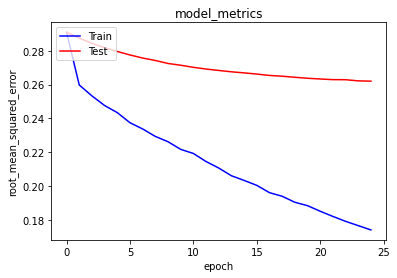

In [65]:
# plot metrics evaluations
plt.plot(history.history['root_mean_squared_error'], color='blue')
plt.plot(history.history['val_root_mean_squared_error'], color='red')
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

berdasarkan visualisasi, pada proses training model didapatkan nilai error akhir sebesar sekitar 0.17 dan error pada data validasi sebesar 0.26

**Get Recommendations**

In [66]:
# films
films_df = df_film
films_df.head()

,film_id,film_name,genre
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [67]:
# data ratings
df = films
df.head()

,movieId,title,genres,year_of_release,userId,rating,timestamp,user,films
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,2.0,4.0,2006-03-03 19:57:00,0,0
57309,2,Jumanji,Adventure|Children|Fantasy,1995,9.0,5.0,1997-03-26 13:32:22,1,1
81537,3,Grumpier Old Men,Comedy|Romance,1995,8.0,4.0,1998-03-21 15:08:26,2,2
93341,4,Waiting to Exhale,Comedy|Drama|Romance,1995,141.0,3.0,1996-07-30 07:29:46,3,3
95864,5,Father of the Bride Part II,Comedy,1995,18.0,4.0,2005-02-13 05:52:25,4,4


mengambil sample data user secara acak dan mendefinisikan variabel 'film_not_visited' yang merupakan daftar film yang belum pernah ditonton oleh users

In [68]:
# taking user samples
user_id = df.userId.sample(1).iloc[0]
films_visited_by_user = df[df.userId == user_id]
 
# bitwise operators (~), can be found here https://docs.python.org/3/reference/expressions.html 
films_not_visited = films_df[~films_df['film_id'].isin(films_visited_by_user.movieId.values)]['film_id'] 
films_not_visited = list(
    set(films_not_visited)
    .intersection(set(films_to_films_encoded.keys()))
)
 
films_not_visited = [[films_to_films_encoded.get(x)] for x in films_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_films_array = np.hstack(
    ([[user_encoder]] * len(films_not_visited), films_not_visited)
)

membuat rekomendasi film dengan model.predict() 

In [69]:
# get recommendations
ratings = model.predict(user_films_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_films_ids = [
    films_encoded_to_films.get(films_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('films with high ratings from user')
print('----' * 8)
 
top_films_user = (
    films_visited_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)
 
films_df_rows = films_df[films_df['film_id'].isin(top_films_user)]
for row in films_df_rows.itertuples():
    print(row.film_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 films recommendation')
print('----' * 8)
 
recommended_films = films_df[films_df['film_id'].isin(recommended_films_ids)]
for row in recommended_films.itertuples():
    print(row.film_name, ':', row.genre)

Showing recommendations for users: 8.0
films with high ratings from user
--------------------------------
Friday : Comedy
Rumble in the Bronx : Action|Adventure|Comedy|Crime
Strange Days : Action|Crime|Drama|Mystery|Scifi|Thriller
Mission: Impossible : Action|Adventure|Mystery|Thriller
Under Siege : Action|Drama|Thriller
--------------------------------
Top 10 films recommendation
--------------------------------
Three Seasons : Drama
Transformers: The Movie : Adventure|Animation|Children|Scifi
Soul Survivors : Horror|Thriller
Tadpole : Comedy|Drama|Romance
Gus : Children|Comedy
Tokyo Decadence : Drama
Gunga Din : Adventure|Comedy|War
Taking Woodstock : Comedy
Education, An : Drama|Romance
I Wish : Children|Drama


Yeay! Model telah bisa memberikan rekomendasi films kepada user. Dimana, hasil rekomendasi untuk userId 228 adalah film dengan genre 'Drama'. Hal ini dapat dilihat pada recommendations high ratings from user dan Top 10 films recommendation untuk user. 

# **Conclusion**

Disini, saya telah berhasil mengembangkan model sistem rekomendasi untuk film menggunakan dua teknik yang berbeda, yaitu Content-Based Filtering dan Collaborative Filtering. Metode collaborative filtering dapat memberikan hasil rekomendasi yang cukup sesuai dengan preferensi pengguna. sedangkan metode content-based filtering juga dapat memberikan rekomendasi film yang similar dengan film yang memiliki kemiripan genre. Namun, ada yang perlu diperhatikan bahwa dataset yang digunakan memiliki data film dengan jumlah yang terbatas, bisa jadi pada dunia nyata model tidak memberikan rekomendasi sesuai yang diinginkan pengguna, dimana ada beberapa pengguna yang menyukai rekomendasi film-film terbaru. sedangkan model bisa saja merekomendasikan film-film keluaran lama.

# **Kriteria Penilaian**

Berikut kriteria submission yang harus Anda penuhi:

- Project merupakan hasil pekerjaan sendiri. **(done)**
- Project belum pernah digunakan untuk submission kelas Machine Learning di Dicoding dan belum pernah dipublikasikan di platform manapun. **(done)**
- Dataset yang dipakai bebas, asal bisa digunakan untuk membuat sistem rekomendasi. **(done)**
- Memberikan **dokumentasi** menggunakan **text cell** pada notebook (.ipynb) untuk menjelaskan **setiap tahapan proyek**. **(done)**
- Menentukan solusi permasalahan dengan memilih pendekatan berikut:
 - Content-based Filtering **(done)**
 - Collaborative Filtering **(done)**
- Membuat draf laporan proyek machine learning yang menjelaskan alur proyek Anda mulai dari project overview, business understanding, data understanding, data preparation, modeling, hingga tahap evaluasi. Ketentuan draf laporan proyek machine learning dapat Anda lihat pada sub modul berikutnya tentang Detail Laporan. **(done)**

Saran Submission
- Menerapkan **Rubrik/Kriteria Penilaian (Tambahan)** untuk mendapatkan skala penilaian (bintang) yang lebih tinggi. **(done)**

<br>

Detail Penilaian Submission:
- **Bintang 1**: Semua ketentuan terpenuhi, tetapi terdapat indikasi plagiat dengan menggunakan proyek orang lain dan hanya mengubah kontennya saja.
- **Bintang 2**: Semua ketentuan terpenuhi, tetapi penulisan kode dan laporan berantakan.
- **Bintang 3**: Semua ketentuan terpenuhi, penulisan kode, dan laporan cukup baik.
- **Bintang 4**: Semua ketentuan terpenuhi, menerapkan minimal tiga (3) **Rubrik Penilaian (Tambahan)** pada laporan.
- **Bintang 5**: Semua ketentuan terpenuhi, menerapkan seluruh (6) **Rubrik Penilaian (Tambahan)** pada laporan.
Jika submission Anda ditolak, maka tidak ada penilaian. Kriteria penilaian bintang di atas hanya berlaku jika submission Anda lulus. **(done)**

<br>

Tips
- Anda dapat memilih beberapa topik rekomendasi (namun tidak terbatas pada daftar) berikut:

 - Rekomendasi film **(done, i build a movie recommendation system)**
 - Rekomendasi buku
 - Rekomendasi musik
 - Rekomendasi video
 - Rekomendasi produk 
 - Rekomendasi artikel
 - Rekomendasi berita
 - dsb.

<br>

Ketentuan Berkas Submission
- Mengirimkan Submission dalam bentuk .zip yang terdiri dari 3 (tiga) berkas, yaitu:  
 - File Jupyter Notebook (.ipynb). Pastikan file Jupyter Notebook sudah dijalankan, ya. **(done)**
 - File Python (.py) **(done)**
 - File laporan dalam bentuk Markdown (.md) atau Text (.txt) **(done)**